In [1]:
import torch
import torch.nn as nn
import torchvision as tv
from torchvision import transforms as T
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np

/home/pill/.conda/envs/pill/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%cd ..

/home/pill/competition/yolov7


torch.Size([3000, 4000, 3])
tensor([[ 960.5001, 2168.0000,  449.0000,  486.0000],
        [1635.0000, 2315.5000,  332.0000,  375.0000],
        [1801.0000, 2724.5000,  332.0000,  357.0000],
        [1019.4999, 2559.0000,  751.0000,  554.0000],
        [1320.0000, 2829.0000,  712.0000,  664.0000]])


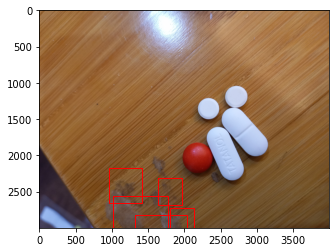

In [34]:
def visual2(img, boxes=None, isTrain=True):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  if boxes is not None:
    if len(boxes.shape) == 1:
      boxes = boxes[None, :]
    for box in boxes:
      x_min, y_min, w, h = box[0], box[1], box[2], box[3]
      rect = matplotlib.patches.Rectangle((x_min, y_min), w, h, color='r', fc='none')
      ax.add_patch(rect)
  plt.imshow(img)

file = 'VAIPE_P_45_17'

img = torch.tensor(mpimg.imread('./vaipe/images/' + file + '.jpg'))
print(img.size())
width, height = img.size()[0], img.size()[1]
boxes = []
with open('./vaipe/labels/' + file + '.txt') as file_in:
  for line in file_in:
    label, x_min, y_min, w, h = line.split(' ')
    x_min, y_min, w, h = float(x_min), float(y_min), float(w), float(h)
    boxes.append([x_min, y_min, w, h])

boxes = torch.tensor(boxes)

#get bbox
boxes = boxes * torch.tensor([width, height, width, height])
print(boxes)
visual2(img, boxes)